In [1]:
from deepdream import dream

from tensorflow.keras.applications import inception_v3
import tensorflow as tf

from IPython.display import clear_output
from matplotlib import pyplot as plt

In [5]:
image_path = 'img1.jpg'


# if you'd like to save your dreamed picture, replace the file path below; otherwise, set it to None
output_path = 'imgop.jpg'


# These are the names of the layers for which we try to maximize activation.
layer_contributions = {
    'mixed3': .5,
    'mixed4': 1.5,
    'mixed5': 3.,
    'mixed6': 2.
}

In [6]:
model = inception_v3.InceptionV3(weights='imagenet', include_top=False)

# We'll maximize the activations of these layers
layers = [model.get_layer(name).output for name in layer_contributions.keys()]

# Create our feature extraction model
dreamer = tf.keras.Model(inputs=model.input, outputs=layers)

print('Model loaded.')

Model loaded.


In [7]:
dreamed_image = dream(image_path, 
      model=dreamer, 
      layer_contributions=layer_contributions,
      output_path=output_path,
      step=0.1,
      iterations=15,
      octaves=4)

Failed to save dreamed image.


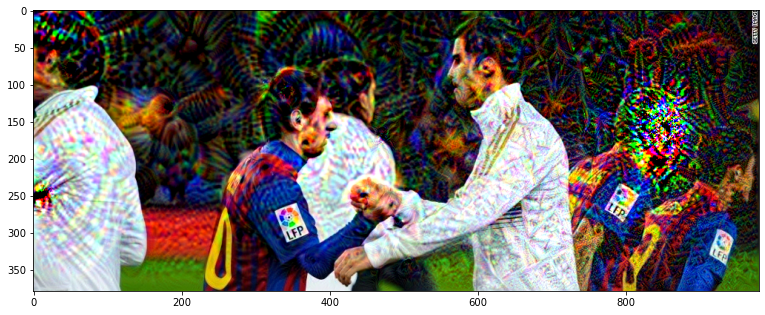

In [8]:
plt.figure(figsize = (13,13))
plt.imshow(dreamed_image)